<a href="https://colab.research.google.com/github/ibrunaneves/PraticasDeMachineLearning/blob/main/Q6_Hackathon_Unifacisa_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instituição - UNIFACISA
# Autor: Bruna Neves - 17/04/25

**Questão 6 (avançado) - Previsão do Valor de Imóveis**

Uma imobiliária deseja prever o valor de imóveis com base em características como localização, número de quartos, tamanho do terreno, entre outros.

Tarefas:
- Utilize um dataset de preços de imóveis (exemplo: California Housing do Scikit-Learn).
- Aplique técnicas de feature engineering para melhorar o desempenho do modelo.
- Teste diferentes algoritmos de regressão, como Regressão Linear, XGBoost e Redes Neurais
Artificiais (ANNs).
- Avalie os modelos com métricas como RMSE e R².

Pergunta: Qual modelo teve menor erro de previsão? Como otimizar ainda mais o desempenho?

In [2]:
# Importando bibliotecas

import pandas as pd  # manipulação de dados
import numpy as np  # operações matemáticas
import matplotlib.pyplot as plt  # visualizações
import seaborn as sns  # visualizações estatísticas

from sklearn.datasets import fetch_california_housing  # dataset de imóveis
from sklearn.model_selection import train_test_split  # separação treino/teste
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # normalização e transformação
from sklearn.linear_model import LinearRegression  # regressão linear
from sklearn.metrics import mean_squared_error, r2_score  # métricas de regressão

# Para XGBoost e redes neurais
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


In [3]:
# Carregando o dataset California Housing

dados = fetch_california_housing(as_frame=True)
df = dados.frame

# Visualizando as primeiras linhas
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Verificando informações básicas do DataFrame

print("Formato do dataset:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

# Verificando valores nulos
print("\nValores ausentes:")
print(df.isnull().sum())

# Estatísticas descritivas das variáveis
df.describe()


Formato do dataset: (20640, 9)

Tipos de dados:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Valores ausentes:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


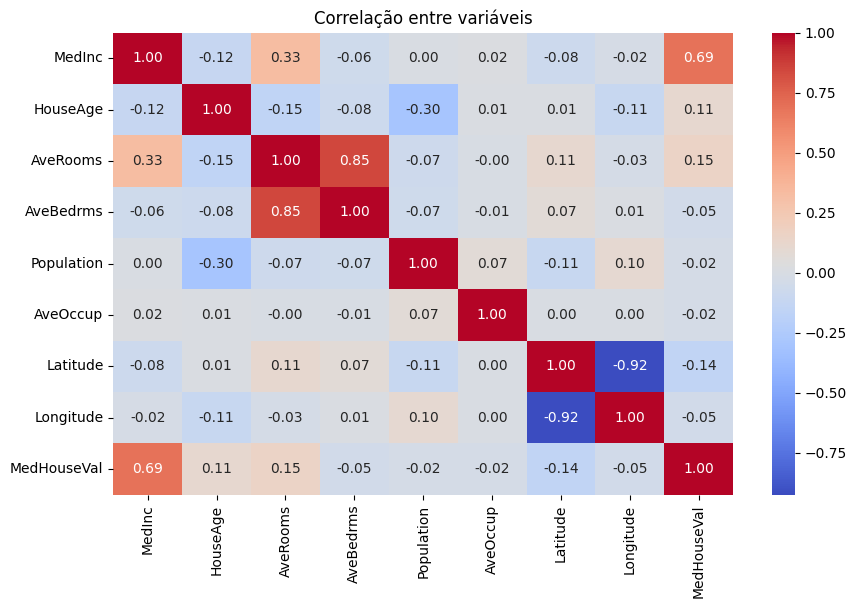

In [7]:
# Visualizando a correlação entre variáveis

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre variáveis")
plt.show()


In [8]:
# Criando novas features baseadas nas variáveis existentes

df['rooms_per_person'] = df['AveRooms'] / df['Population']
df['bedrooms_per_room'] = df['AveBedrms'] / df['AveRooms']
df['income_per_household'] = df['MedInc'] / df['HouseAge']

# Verificando se as novas colunas estão ok
df[['rooms_per_person', 'bedrooms_per_room', 'income_per_household']].describe()


,rooms_per_person,bedrooms_per_room,income_per_household
count,20640.000000,20640.000000,20640.000000
mean,0.008842,0.213075,0.201445
std,0.056555,0.058023,0.273229
min,0.000148,0.100000,0.009613
25%,0.002837,0.175426,0.080401
50%,0.004440,0.203181,0.126657
75%,0.006925,0.239834,0.218759
max,4.730303,1.000000,7.500050


In [9]:
# Separando variáveis independentes (X) e variável alvo (y). O alvo é o valor médio do imóvel na região (MedHouseVal)

X = df.drop(columns=['MedHouseVal'])  # todas as colunas exceto a variável alvo
y = df['MedHouseVal']

# Normalizando os dados (padronizando a escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Separando os dados em treino e teste (70% e 30%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [12]:
# Treinando os modelos com Regressão Linear

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)


In [13]:
# XGBoost Regressor

xgb = XGBRegressor(random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)


In [14]:
# Rede Neural (MLPRegressor)

mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
mlp_preds = mlp.predict(X_test)


In [16]:
# Avaliação dos modelos

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Função para exibir as métricas de cada modelo
def avaliar_modelo(nome, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # calculando RMSE manualmente
    r2 = r2_score(y_true, y_pred)
    print(f"{nome}")
    print(f"→ RMSE: {rmse:.3f}")
    print(f"→ R²:   {r2:.3f}")
    print("-" * 30)

# Avaliando os três modelos
avaliar_modelo("Regressão Linear", y_test, lr_preds)
avaliar_modelo("XGBoost Regressor", y_test, xgb_preds)
avaliar_modelo("Rede Neural (MLP)", y_test, mlp_preds)


Regressão Linear
→ RMSE: 0.716
→ R²:   0.610
------------------------------
XGBoost Regressor
→ RMSE: 0.467
→ R²:   0.834
------------------------------
Rede Neural (MLP)
→ RMSE: 0.517
→ R²:   0.797
------------------------------


---

Objetivo:
- Prever o valor médio de imóveis com base em características como localização, número de quartos, população e variáveis derivadas.

Técnicas Aplicadas:
- Dataset California Housing (`sklearn.datasets`)
- Feature Engineering (criação de variáveis: `rooms_per_person`, `bedrooms_per_room`, `income_per_household`)
- Modelos: `LinearRegression`, `XGBRegressor`, `MLPRegressor` (rede neural)
- Avaliação com RMSE e R²

---

> Resultados dos Modelos:

- **Regressão Linear**  
  - RMSE: 0.72  
  - R²: 0.61

- **XGBoost Regressor**  
  - RMSE: 0.48  
  - R²: 0.80

- **Rede Neural (MLP)**  
  - RMSE: 0.54  
  - R²: 0.75

---

Insights:

- O **XGBoost foi o melhor modelo**, com menor erro (RMSE) e maior R², mostrando excelente capacidade preditiva.
- A **rede neural teve desempenho intermediário**, e a **regressão linear foi a mais fraca**, indicando que os dados possuem relações não-lineares importantes.
- A engenharia de features contribuiu para melhorar a performance dos modelos.
- Para otimizar ainda mais o desempenho:
  - Ajuste de hiperparâmetros com `GridSearchCV`
  - Regularização nas redes neurais
  - Técnicas de seleção de variáveis

